# Build and use a Keras model


    1. Define Network.
    2. Compile Network.
    3. Fit Network.
    4. Evaluate Network.
    5. Make Predictions.

In [7]:
#Import numpy
import numpy as np
np.random.seed(123)  # for reproducibility
from IPython.display import Image

import xarray as xr
from affine import Affine

from matplotlib import pyplot as plt

#import requiered keras bits
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

from keras.utils import np_utils

In [16]:
#open geotiff

data = xr.open_rasterio('/g/data/u46/users/dxr251/woody-v6/woody_60_-149.tif')

train_class= xr.open_rasterio('/g/data/u46/users/ck9738/Datasets/ML_for_smad_green/classification_outputs/Pakrks_urbare_one.tif')

In [23]:
data

<xarray.DataArray (band: 3, y: 1000, x: 1000)>
array([[[0.013063, 0.013131, ..., 0.006124, 0.006593],
        [0.013734, 0.013167, ..., 0.006583, 0.004495],
        ...,
        [0.00996 , 0.010427, ..., 0.004107, 0.004645],
        [0.012028, 0.009467, ..., 0.001742, 0.003849]],

       [[0.374153, 0.376019, ..., 0.693144, 0.669847],
        [0.377847, 0.379002, ..., 0.677447, 0.653136],
        ...,
        [0.459452, 0.466307, ..., 0.540635, 0.560477],
        [0.472873, 0.462249, ..., 0.45559 , 0.521387]],

       [[0.350644, 0.350466, ..., 0.631847, 0.606604],
        [0.347751, 0.347789, ..., 0.627827, 0.609666],
        ...,
        [0.442799, 0.448   , ..., 0.519219, 0.531263],
        [0.453587, 0.445638, ..., 0.449587, 0.509299]]], dtype=float32)
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 -3.7e+06 -3.7e+06 -3.7e+06 -3.7e+06 -3.7e+06 ...
  * x        (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...
Attributes:
    transform:   (25.0, 0

In [22]:
data_X = np.array(data)
train_Y = np.array(train_class[3])
train_Y.shape

(2622, 3017)

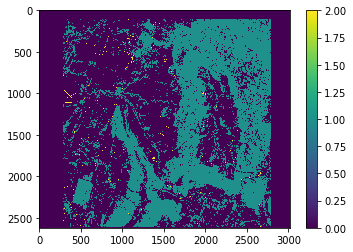

In [21]:
plt.imshow(train_Y)
plt.colorbar()

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
train_Y = np_utils.to_categorical(train_Y, 3)

1. Define Network.

A keras model or neural network is built up of layers with in a framework. Below is a simplifed representation of an artificial neural network, The *Hidden layers* in the diagram below represent the layers we will build into our model that are then trained to filter and sort our data into the output catergoies. 


![image of ann model](http://uc-r.github.io/public/images/analytics/deep_learning/deep_nn.png)

In this example we are going to build a model using the Sequential Class framework.

In [13]:
#import requiered keras model
from keras.models import Sequential

#define a model
model = Sequential()

We will use 5 types of layers to construct the model: 

    Dense Layers
    Convolutional Layers
    Dropout Layers
    
These are just 5 of a large number of possible layers to use. 

__Dense__ and __Convolution__ are both a kind of trainable layer, represented by the *Hidden Layers* in the diagram above. 
__Dropout__ not represented in the image above make adjustments to the out puts of other layers to optimise the opperation of the model as a whole and prevent overtraining.

In [15]:
#import keras layers
from keras.layers import Dense, Dropout, Activation, Conv2D

## Dense Layers 

also known as fully-connected layers and Densely-connected layers these layers are more or less the basic building block of an artificial neural network.

Dense Layers receive Inputs and produce a set number of Outputs. Each input has the potential to be sorted into each output, visually it would be represented by two sets of dots and an arrow running from each dot in the first set to each dot of the second set. This is what is ment by 'fully-connected' 

![image example]



## Convolutional Layers

Particularly useful for analysing image data Convolutional layers are more complex than Dense Layers. 
![image](https://appsilon.com/blog-old/assets/article_images/2017-11-20-keras/xconvolve.png.pagespeed.ic.qRg4ttF5wj.png)

they apply peramiters based on infrom

In [ ]:


#Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None)

#When using this layer as the first layer in a model, provide the keyword argument:
#input_shape (tuple of integers, does not include the sample axis), 
#e.g.  input_shape=(128, 128, 3) for 128x128 RGB pictures in 

In [ ]:
#mased on baseline model from Gardner and Nichols 2017
#1 input

#convolutuion 32, 3x3, stride 1, reLU activation
model.add(Conv2D(32(3,3),strides=(1,1), activation='relu', input_shape=(1000,1000,3)))
#MaxPool 2X2
model.add(MaxPooling2D(pool_size=(2,2)))
#convolutuion 64, 4x4, stride 1, reLU activation
model.add(Conv2D(32(3,3),strides=(1,1), activation='relu'))
#MaxPool 2X2
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout 0.25
model.add(Dropout(0.25))
#FC layer 128 ReLU activation
model.add(Dense(128, activation='relu'))
#dropout 0.5
model.add(Dropout(0.5))
#FC layer 17 output? 17 feature lables (we want 3??)
model.add(Dense(3), activation='softmax')

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)